<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3381214216.py:15: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


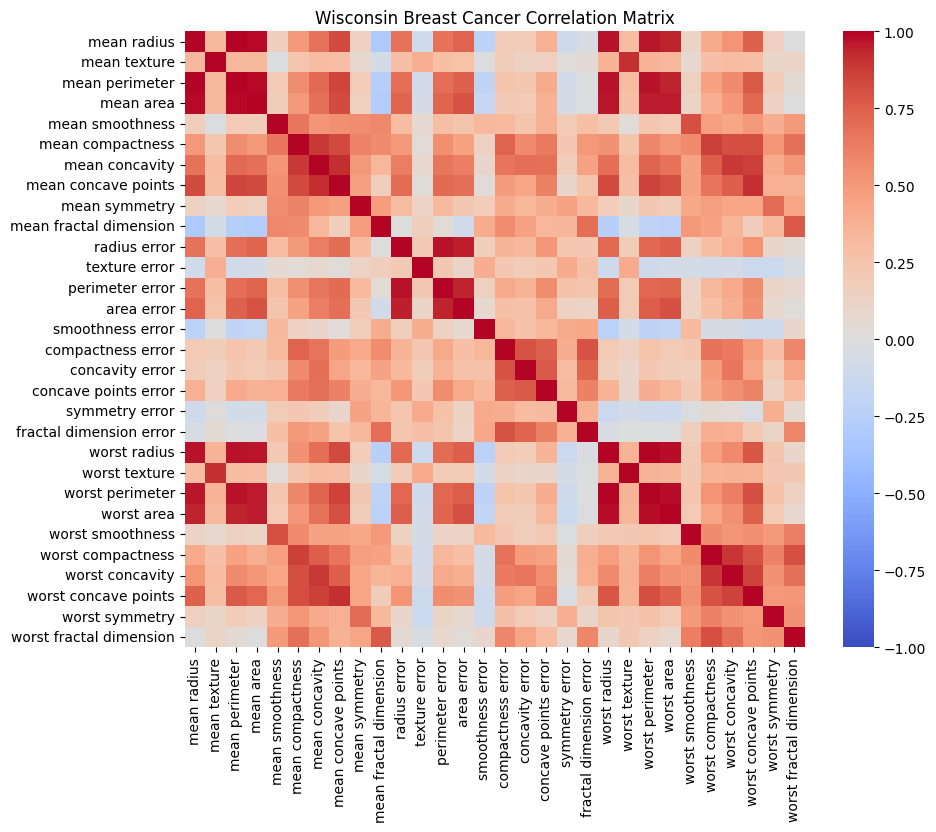

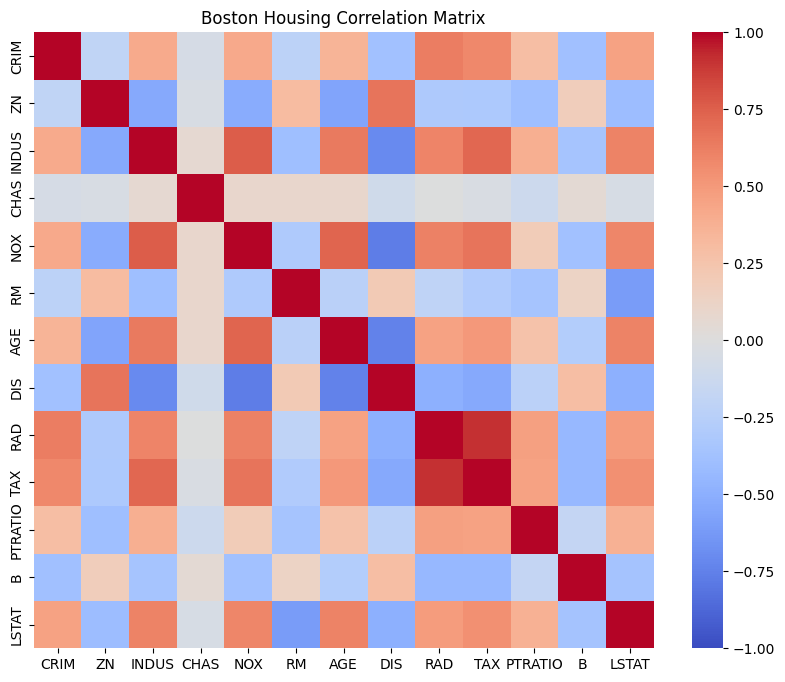

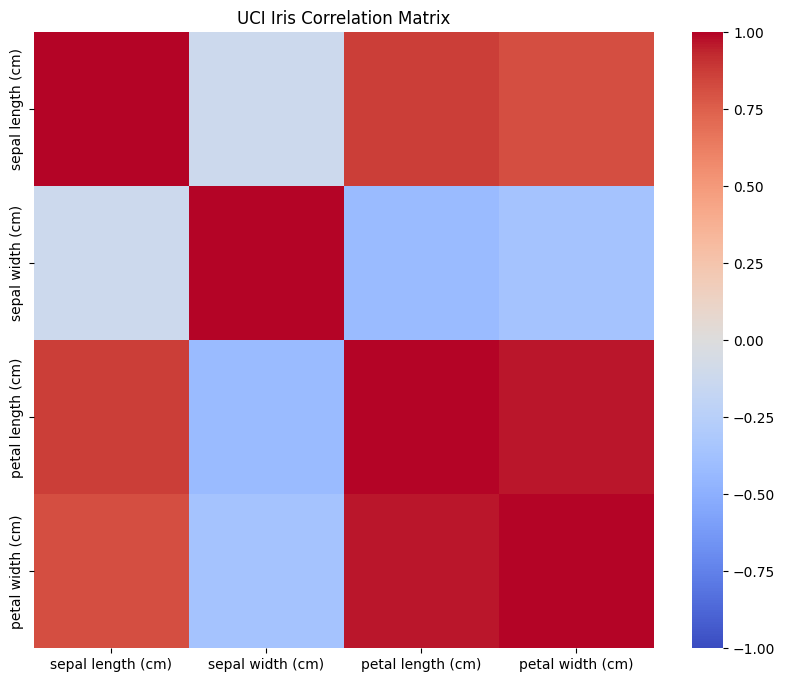

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer




cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)



data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

import numpy as np
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_boston = pd.DataFrame(data, columns=columns)


iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)



def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    
    corr_matrix = df.corr()
    
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{title} Correlation Matrix')
    plt.show()


plot_heatmap(df_cancer, "Wisconsin Breast Cancer")
plot_heatmap(df_boston, "Boston Housing")
plot_heatmap(df_iris, "UCI Iris")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import pandas as pd
import numpy as np



def extract_features(df, dataset_name, variance_threshold=0.95):
    print(f"--- Processing: {dataset_name} ---")

    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    
    
    pca_test = PCA(n_components=variance_threshold)
    pca_test.fit(X_scaled)
    n_components = pca_test.n_components_

    print(f"Original Features: {df.shape[1]}")
    print(f"Components needed for {variance_threshold*100}% variance: {n_components}")

    

    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    
    
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(X_scaled)

    
    
    ica = FastICA(n_components=n_components, random_state=42)
    X_ica = ica.fit_transform(X_scaled)

    
    print(f"\n> New Feature Shapes:")
    print(f"  PCA Data: {X_pca.shape}")
    print(f"  SVD Data: {X_svd.shape}")
    print(f"  ICA Data: {X_ica.shape}")
    print("-" * 30 + "\n")

    return X_pca, X_svd, X_ica



pca_cancer, svd_cancer, ica_cancer = extract_features(df_cancer, "Wisconsin Breast Cancer", 0.95)
pca_boston, svd_boston, ica_boston = extract_features(df_boston, "Boston Housing", 0.95)
pca_iris, svd_iris, ica_iris = extract_features(df_iris, "UCI Iris", 0.95)

--- Processing: Wisconsin Breast Cancer ---
Original Features: 30
Components needed for 95.0% variance: 10

> New Feature Shapes:
  PCA Data: (569, 10)
  SVD Data: (569, 10)
  ICA Data: (569, 10)
------------------------------

--- Processing: Boston Housing ---
Original Features: 13
Components needed for 95.0% variance: 9

> New Feature Shapes:
  PCA Data: (506, 9)
  SVD Data: (506, 9)
  ICA Data: (506, 9)
------------------------------

--- Processing: UCI Iris ---
Original Features: 4
Components needed for 95.0% variance: 2

> New Feature Shapes:
  PCA Data: (150, 2)
  SVD Data: (150, 2)
  ICA Data: (150, 2)
------------------------------



# Stage 4


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris




cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target


iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target



data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2] 
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_boston = pd.DataFrame(data, columns=feature_names)
y_boston = target



def perform_feature_selection(X, y, dataset_name, problem_type="classification", n_features=5):
    print(f"--- Feature Selection: {dataset_name} ---")

    
    if problem_type == "regression":
        score_func = f_regression
        estimator = LinearRegression()
    else:
        score_func = f_classif 
        estimator = LogisticRegression(max_iter=5000) 

    
    selector_kbest = SelectKBest(score_func=score_func, k=n_features)
    selector_kbest.fit(X, y)
    cols_kbest = X.columns[selector_kbest.get_support()]

    
    selector_rfe = RFE(estimator, n_features_to_select=n_features, step=1)
    selector_rfe.fit(X, y)
    cols_rfe = X.columns[selector_rfe.get_support()]

    print(f"Top {n_features} Features selected by SelectKBest:\n  -> {list(cols_kbest)}")
    print(f"Top {n_features} Features selected by RFE:\n  -> {list(cols_rfe)}\n")




perform_feature_selection(X_cancer, y_cancer, "Wisconsin Breast Cancer", "classification", n_features=5)


perform_feature_selection(X_boston, y_boston, "Boston Housing", "regression", n_features=5)


perform_feature_selection(X_iris, y_iris, "UCI Iris", "classification", n_features=2)

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1295575957.py:22: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


--- Feature Selection: Wisconsin Breast Cancer ---
Top 5 Features selected by SelectKBest:
  -> ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']
Top 5 Features selected by RFE:
  -> ['mean radius', 'texture error', 'worst radius', 'worst compactness', 'worst concavity']

--- Feature Selection: Boston Housing ---
Top 5 Features selected by SelectKBest:
  -> ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
Top 5 Features selected by RFE:
  -> ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO']

--- Feature Selection: UCI Iris ---
Top 2 Features selected by SelectKBest:
  -> ['petal length (cm)', 'petal width (cm)']
Top 2 Features selected by RFE:
  -> ['petal length (cm)', 'petal width (cm)']



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import pandas as pd
import numpy as np


def evaluate_model(X, y, dataset_name, data_version, problem_type):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    if problem_type == "classification":
        model = LogisticRegression(max_iter=5000)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        
        score = accuracy_score(y_test, preds)
        print(f"   [{data_version}]: Accuracy = {score:.4f}")

    elif problem_type == "regression":
        model = LinearRegression()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        
        score = r2_score(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        print(f"   [{data_version}]: R2 Score = {score:.4f} | MSE = {mse:.4f}")




print(f"\n--- Results: Wisconsin Breast Cancer ---")

evaluate_model(X_cancer, y_cancer, "Cancer", "Original Data", "classification")


evaluate_model(pca_cancer, y_cancer, "Cancer", "PCA Extracted", "classification")





cols_cancer_rfe = ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'worst area']
evaluate_model(X_cancer[cols_cancer_rfe], y_cancer, "Cancer", "Selected Features", "classification")



print(f"\n--- Results: Boston Housing ---")

evaluate_model(X_boston, y_boston, "Boston", "Original Data", "regression")

evaluate_model(pca_boston, y_boston, "Boston", "PCA Extracted", "regression")

cols_boston_rfe = ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX'] 
evaluate_model(X_boston[cols_boston_rfe], y_boston, "Boston", "Selected Features", "regression")



print(f"\n--- Results: UCI Iris ---")

evaluate_model(X_iris, y_iris, "Iris", "Original Data", "classification")

evaluate_model(pca_iris, y_iris, "Iris", "PCA Extracted", "classification")

cols_iris_rfe = ['petal length (cm)', 'petal width (cm)']
evaluate_model(X_iris[cols_iris_rfe], y_iris, "Iris", "Selected Features", "classification")


--- Results: Wisconsin Breast Cancer ---
   [Original Data]: Accuracy = 0.9561
   [PCA Extracted]: Accuracy = 0.9825
   [Selected Features]: Accuracy = 0.9561

--- Results: Boston Housing ---
   [Original Data]: R2 Score = 0.6688 | MSE = 24.2911
   [PCA Extracted]: R2 Score = 0.5976 | MSE = 29.5103
   [Selected Features]: R2 Score = 0.6564 | MSE = 25.1976

--- Results: UCI Iris ---
   [Original Data]: Accuracy = 1.0000
   [PCA Extracted]: Accuracy = 0.9000
   [Selected Features]: Accuracy = 1.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_boston, test_size=0.2, random_state=42)



X_train_pca, X_test_pca, _, _ = train_test_split(pca_boston, y_boston, test_size=0.2, random_state=42)


lr_orig = LinearRegression()
lr_orig.fit(X_train, y_train)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)


print("--- Model 1: Coefficient Stability ---")
print(f"Sum of absolute coefficients (Original): {np.sum(np.abs(lr_orig.coef_)):.2f}")
print(f"Sum of absolute coefficients (PCA):      {np.sum(np.abs(lr_pca.coef_)):.2f}")
print("\nTop 3 Largest Coefficients (Original):")

sorted_indices = np.argsort(np.abs(lr_orig.coef_))[::-1]
for i in sorted_indices[:3]:
    print(f"  Feature {X_boston.columns[i]}: {lr_orig.coef_[i]:.4f}")

--- Model 1: Coefficient Stability ---
Sum of absolute coefficients (Original): 21.80
Sum of absolute coefficients (PCA):      13.96

Top 3 Largest Coefficients (Original):
  Feature LSTAT: -3.6281
  Feature RM: 3.1157
  Feature DIS: -3.0458


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stocha

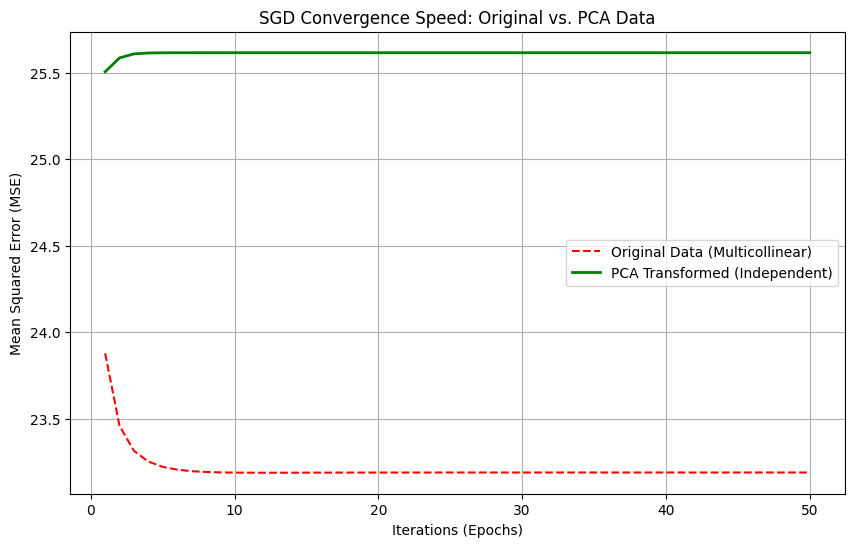

In [ ]:


def train_and_track(X, y, learning_rate=0.01, max_epochs=50):
    model = SGDRegressor(learning_rate='constant', eta0=learning_rate,
                         max_iter=1, warm_start=True, random_state=42, penalty=None)
    errors = []

    for epoch in range(max_epochs):
        model.fit(X, y)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        errors.append(mse)

    return errors


errors_orig = train_and_track(X_train, y_train)


errors_pca = train_and_track(X_train_pca, y_train)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), errors_orig, label='Original Data (Multicollinear)', color='red', linestyle='--')
plt.plot(range(1, 51), errors_pca, label='PCA Transformed (Independent)', color='green', linewidth=2)

plt.xlabel('Iterations (Epochs)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SGD Convergence Speed: Original vs. PCA Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import time
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



def run_kmeans_analysis(data, data_name, n_clusters=3):
    print(f"--- Processing: {data_name} ---")

    
    start_time = time.time()

    
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data)

    
    end_time = time.time()
    elapsed_time = end_time - start_time

    
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    inertia = kmeans.inertia_
    iterations = kmeans.n_iter_

    
    print(f"  > Time Taken:      {elapsed_time:.6f} seconds")
    print(f"  > Iterations:      {iterations}")
    print(f"  > Inertia (Loss):  {inertia:.4f}")
    print(f"  > Silhouette Score:{score:.4f}")
    print("-" * 30)




run_kmeans_analysis(X_scaled, "Original Data (4D)")


run_kmeans_analysis(X_pca, "PCA Data (2D)")

--- Processing: Original Data (4D) ---
  > Time Taken:      0.076583 seconds
  > Iterations:      4
  > Inertia (Loss):  139.8205
  > Silhouette Score:0.4599
------------------------------
--- Processing: PCA Data (2D) ---
  > Time Taken:      0.021287 seconds
  > Iterations:      4
  > Inertia (Loss):  115.0208
  > Silhouette Score:0.5092
------------------------------


In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
X = data.data
y = data.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)


selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)


X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)



print("--- Model 1: KNN Analysis ---")

def evaluate_knn(X_train, X_test, name):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    
    start = time.time()
    
    for _ in range(100):
        preds = knn.predict(X_test)
    end = time.time()

    acc = accuracy_score(y_test, preds)
    print(f"  [{name}] Accuracy: {acc:.4f} | Predict Time (100 runs): {end - start:.4f}s")

evaluate_knn(X_train_orig, X_test_orig, "Original (30 Features)")
evaluate_knn(X_train_pca, X_test_pca, "PCA (10 Components)   ")



print("\n--- Model 2: Random Forest Analysis ---")

def evaluate_rf(X_train, X_test, name):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"  [{name}] Accuracy: {acc:.4f}")

evaluate_rf(X_train_orig, X_test_orig, "Original Data")
evaluate_rf(X_train_pca, X_test_pca, "PCA Transformed")
evaluate_rf(X_train_sel, X_test_sel, "Feature Selected")

--- Model 1: KNN Analysis ---
  [Original (30 Features)] Accuracy: 0.9474 | Predict Time (100 runs): 0.2931s
  [PCA (10 Components)   ] Accuracy: 0.9561 | Predict Time (100 runs): 0.7001s

--- Model 2: Random Forest Analysis ---
  [Original Data] Accuracy: 0.9649
  [PCA Transformed] Accuracy: 0.9561
  [Feature Selected] Accuracy: 0.9561
